In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier   # we will use the kNN classifier template model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

       FlowPattern          Vsl          Vsg          VisL          VisG  \
count  5675.000000  5675.000000  5675.000000  5.675000e+03  5.675000e+03   
mean      4.059912     0.899747     6.222612  1.000000e-03  2.000000e-05   
std       1.379238     1.425159     8.699644  4.055273e-17  2.361736e-18   
min       1.000000     0.001100     0.003720  1.000000e-03  2.000000e-05   
25%       3.000000     0.016000     0.162055  1.000000e-03  2.000000e-05   
50%       5.000000     0.250000     1.600000  1.000000e-03  2.000000e-05   
75%       5.000000     1.500000    10.000000  1.000000e-03  2.000000e-05   
max       7.000000    25.517000    42.956200  1.000000e-03  2.000000e-05   

         DenL          DenG            ST          Ang           ID  
count  5675.0  5.675000e+03  5.675000e+03  5675.000000  5675.000000  
mean   1000.0  1.800000e+00  7.000000e-02     2.727401     0.038657  
std       0.0  4.108187e-14  5.690394e-15    46.202822     0.012985  
min    1000.0  1.800000e+00  7.0000

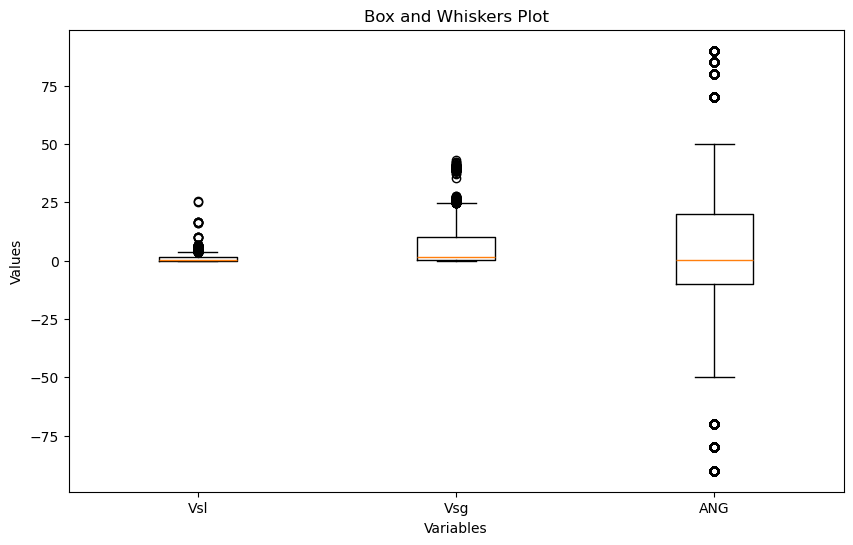

In [4]:
###QUESTION 1
##Loading dataset via panadas, taking the first row as the header
df=pd.read_csv('BDOShoham.csv',header=0)
#summarizes the dataframe
print(df.describe()) ##deliverable for question 1

plt.figure(figsize=(10, 6))
plt.boxplot([df['Vsl'], df['Vsg'], df['Ang']], labels=['Vsl', 'Vsg', 'ANG'])
plt.title('Box and Whiskers Plot')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show() ##deliverable for question 1


In [6]:
#Question 2 Creating a training set, and test set in a reproducible manner
df=df[["FlowPattern","Vsg","Ang","Vsl"]] ##keep only the variables that we need


###Splitting into test data and training date 
test_pct = 0.20   # reserve 20% of the data points for testing performance
seed = 7          # specifying the seed allows for repeatability
X=df[["Vsg","Ang","Vsl"]]
y=df[["FlowPattern"]]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed) ###deliverable for Question 2
print(X_train)

           Vsg    Ang      Vsl
3192   0.04000   0.25  2.49795
1514   0.08058  30.00  2.34387
5248   0.06332  50.00  0.40010
4377   0.01600  -1.00  0.10000
5449   9.45435  90.00  0.15521
...        ...    ...      ...
4307   2.47454  30.00  0.00385
2550   0.10212  70.00  0.00396
537   10.00000   2.00  0.00250
1220  16.00000 -10.00  0.06300
4271   0.24920  30.00  0.98217

[4540 rows x 3 columns]


In [12]:
##Question 3 Part A-Logistc regression
logit_model = LogisticRegression(solver='liblinear')
logit_model.fit(X_train, y_train)  # train the model on the training data
y_predicted = logit_model.predict(X_train)  # make predictions using the validation data 

##clasification report
print(classification_report(y_train, y_predicted)) ##deliverable for Q3

cm_log = confusion_matrix(y_train, y_predicted) 
print(cm_log) ##deliverable Q3
scores_log = cross_val_score(logit_model, X_train, y_train, cv=5, scoring='f1_weighted')
mean_score=np.mean(scores_log)

print("F1 Scores for each fold:", scores_log) ##cross validation score using training set
print("Mean score for default model", mean_score)


              precision    recall  f1-score   support

           1       0.84      0.56      0.67       478
           2       0.00      0.00      0.00       113
           3       0.42      0.12      0.19       694
           4       0.66      0.64      0.65       816
           5       0.67      0.92      0.78      2335
           7       0.00      0.00      0.00       104

    accuracy                           0.67      4540
   macro avg       0.43      0.37      0.38      4540
weighted avg       0.61      0.67      0.61      4540

[[ 266    0    2    1  209    0]
 [   0    0    0    0  113    0]
 [   3    0   83  165  443    0]
 [   0    0   89  524  203    0]
 [  48    0   23  108 2156    0]
 [   0    0    0    0  104    0]]
F1 Scores for each fold: [0.62227382 0.62696128 0.60114643 0.61326294 0.60759094]
Mean score for default model 0.6142470810065276


C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedM

In [14]:
##Question 3 Part A-KNN
neigh = KNeighborsClassifier(n_neighbors=3)  # base model will only consider the THREE nearest neighbors, and use minowksi metric
neigh.fit(X_train,y_train)
predicted_y_knn = neigh.predict(X_train)


print(classification_report(y_train, predicted_y_knn)) #deliverable for Q3
cm_knn = confusion_matrix(y_train, predicted_y_knn)
print(cm_knn) ##deliverable for Q3

scores_knn = cross_val_score(neigh, X_train, y_train, cv=5, scoring='f1_weighted')
mean_score=np.mean(scores_knn)
print("mean score for default model", mean_score)
print("F1 Scores for each fold:", scores_knn) ##deliverable for Q3


C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

              precision    recall  f1-score   support

           1       0.91      0.92      0.92       478
           2       0.93      0.93      0.93       113
           3       0.91      0.96      0.93       694
           4       0.92      0.92      0.92       816
           5       0.96      0.94      0.95      2335
           7       0.87      0.94      0.90       104

    accuracy                           0.94      4540
   macro avg       0.92      0.94      0.93      4540
weighted avg       0.94      0.94      0.94      4540

[[ 440    0    3    0   35    0]
 [   0  105    5    0    3    0]
 [   1    5  665   16    7    0]
 [   0    0   36  751   29    0]
 [  41    3   24   53 2199   15]
 [   0    0    0    0    6   98]]
mean score for default model 0.8557524351331989
F1 Scores for each fold: [0.86405313 0.85577034 0.85230203 0.86029166 0.84634502]


C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [16]:
#########################Question 4 KNN, f1 score, changed nearest neighbors to 2 and metric to Euclidean
neigh_model_2 = KNeighborsClassifier(n_neighbors=2,metric="euclidean")  # Our model will only consider the THREE nearest neighbors
neigh_model_2.fit(X_train,y_train)  

predicted_y_knn_model_2 = neigh_model_2.predict(X_test)  
scores_knn_model2 = cross_val_score(neigh_model_2, X_train, y_train, cv=5, scoring='f1_weighted')
mean_score=np.mean(scores_knn_model2)
print("Mean f1 score for changed model", mean_score)
print("F1 Scores for each fold:", scores_knn_model2)

Mean f1 score for changed model 0.8486071113294908
F1 Scores for each fold: [0.85806141 0.85770049 0.84929183 0.84039374 0.83758809]


C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [18]:
#Quesiton 5 The best model is the default one, with 3 neighbors, and Minkowsi metric
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)

predicted_y_knn = neigh.predict(X_test)  # We're hoping this predicts a "1", since this is a "top and to the right" point.

print("the superior model was the default on: here are the performance reports")
print(classification_report(y_test, predicted_y_knn))  #deliverable for 5
cm_knn = confusion_matrix(y_test, predicted_y_knn)
print(cm_knn)

the superior model was the default on: here are the performance reports
              precision    recall  f1-score   support

           1       0.73      0.82      0.77       116
           2       0.81      0.96      0.88        27
           3       0.78      0.87      0.82       184
           4       0.84      0.81      0.82       217
           5       0.92      0.87      0.90       570
           7       0.57      0.62      0.59        21

    accuracy                           0.85      1135
   macro avg       0.78      0.82      0.80      1135
weighted avg       0.86      0.85      0.85      1135

[[ 95   0   3   0  18   0]
 [  0  26   0   0   1   0]
 [  2   6 160  12   4   0]
 [  0   0  28 175  14   0]
 [ 29   0  14  21 496  10]
 [  4   0   0   0   4  13]]


C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
